In [7]:
from legend_plot_style import LEGENDPlotStyle as lps
lps.use("legend_talks")
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import math
from collections import Counter

file_path = '/home/eric/sim/WWLegend/OpticalSimulation/OnlyGammaCaptures/'
""" Amount is required to know how many entries belong to each neutron. 
    nPMMA is an array where each entry says how many photon timestamp belong to that neutron.
    Time for the time entries. Each entry is one photon timestamp.
    no is required to match Shower IDs, Identifier for something else.
    Read in 2 different setups to compare!"""
x1, y1, z1 = np.loadtxt(file_path + "build/output0_nt_Hits.csv", dtype=float, delimiter=',', unpack=True)


In [8]:
radius1 = np.sqrt(x1*x1 + y1 * y1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


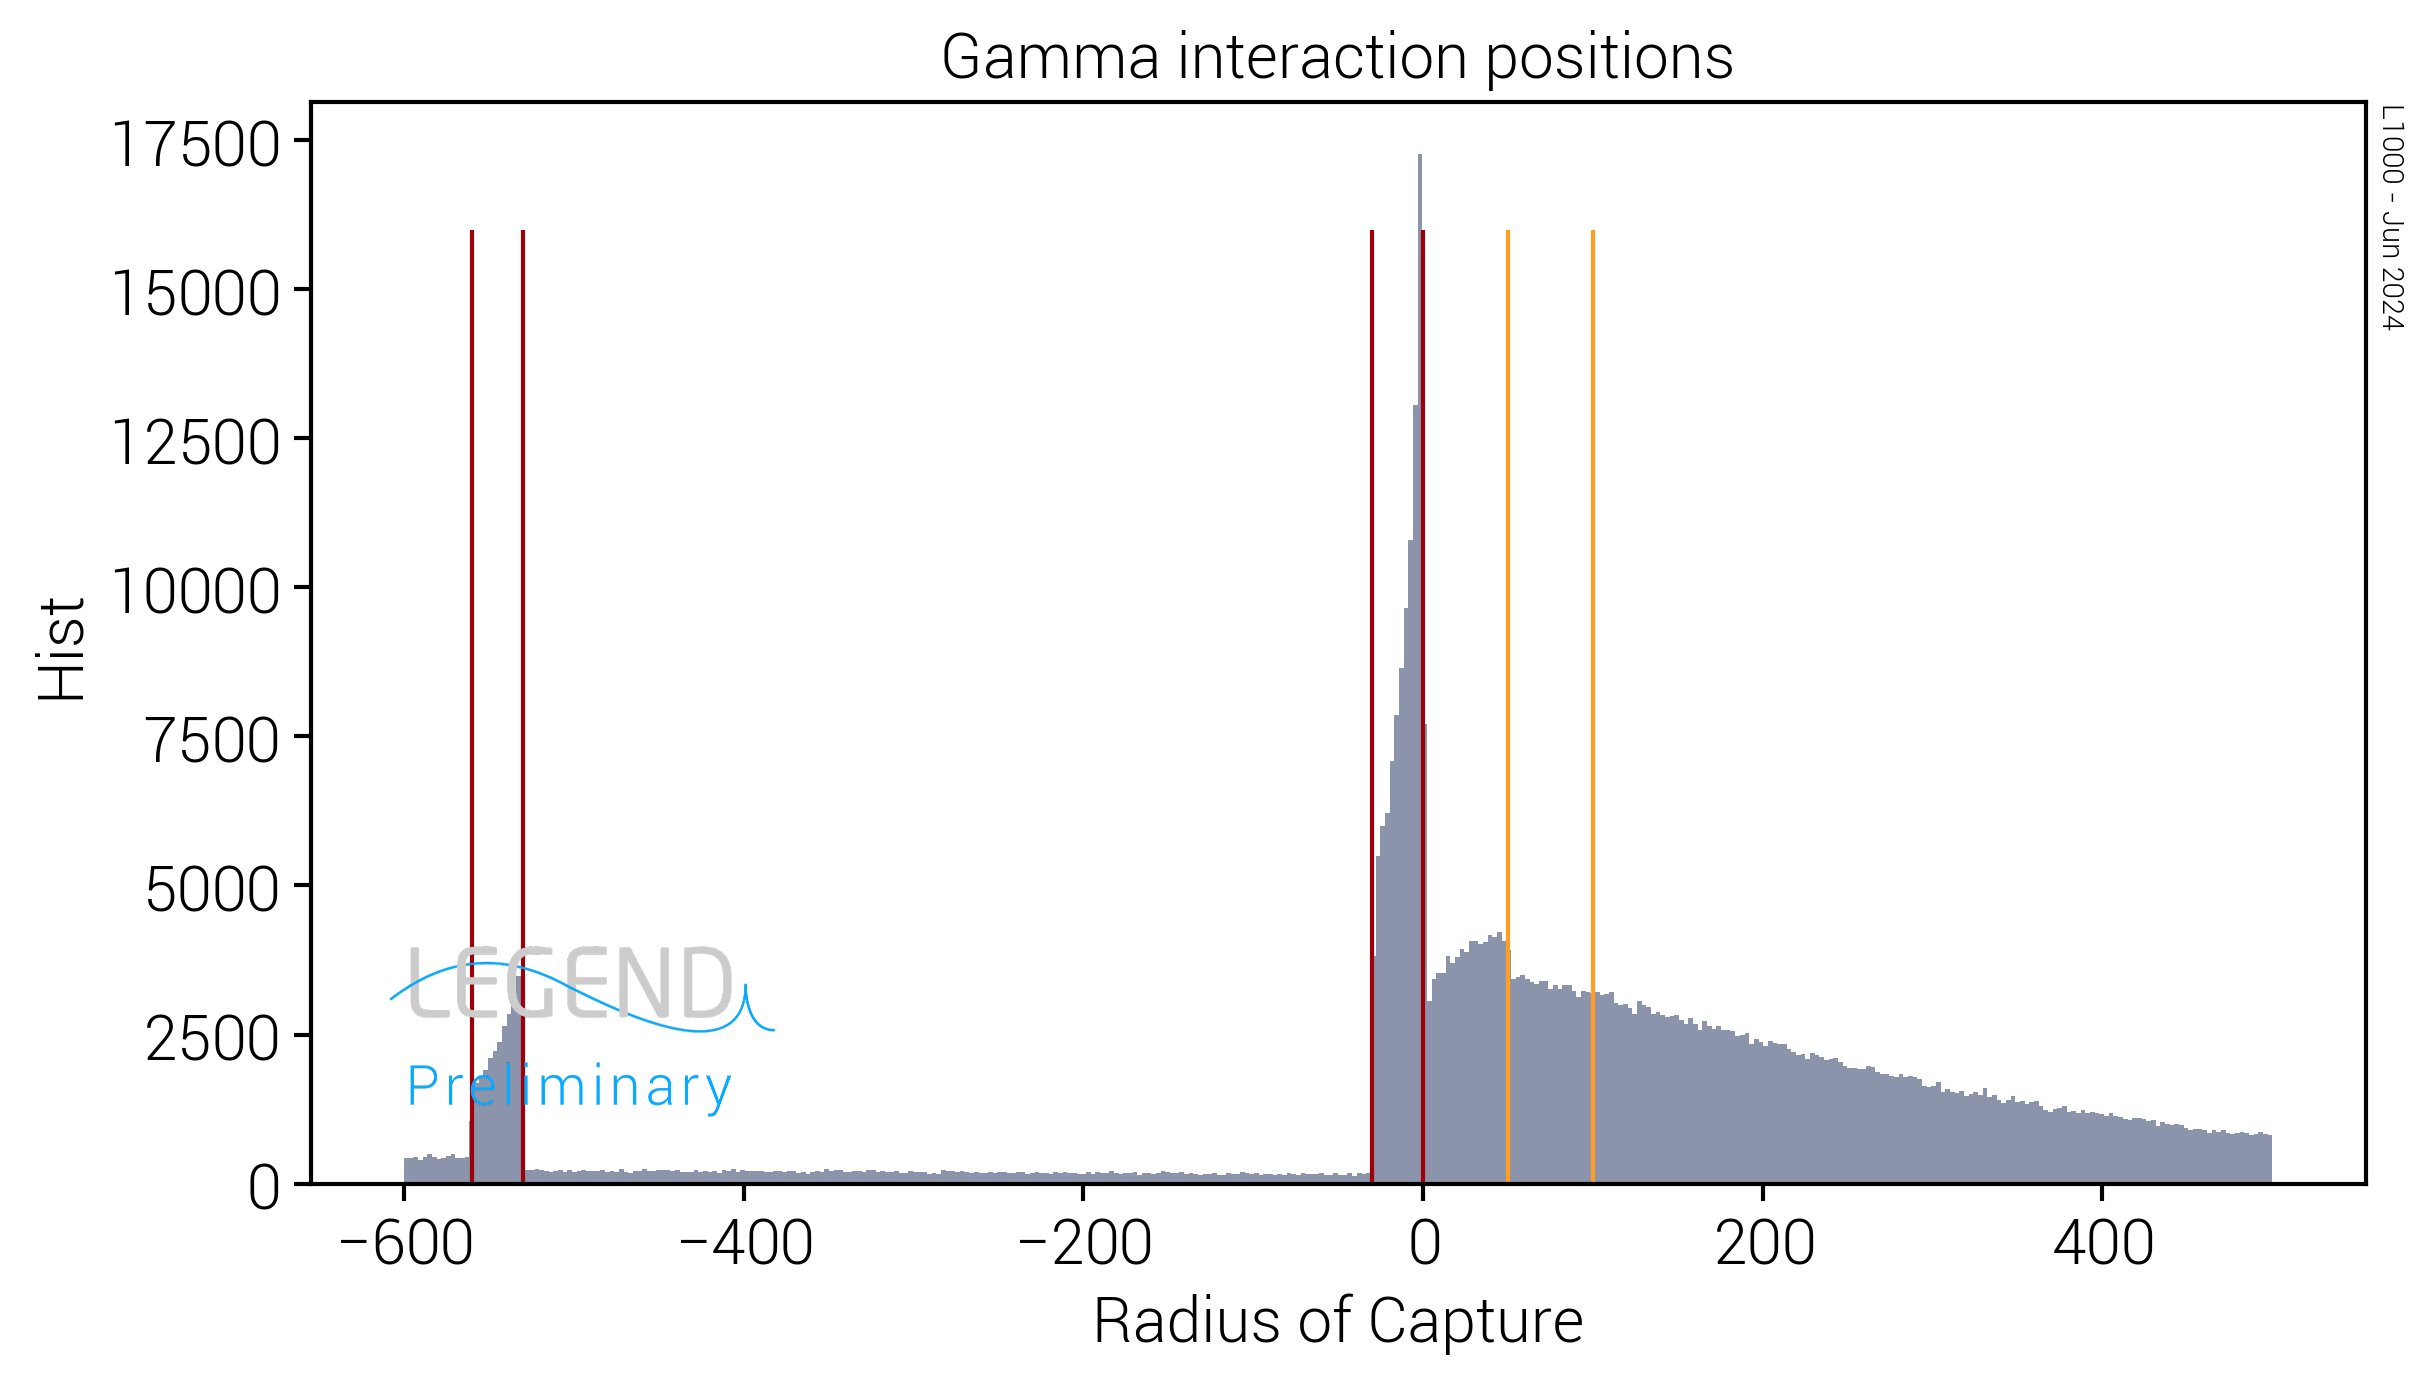

The fraction of events between 50 and 100 compared to events from 0 to 6000 is 0.1883


In [23]:
fig, ax1 = plt.subplots()
counts, bin_edges, patches = ax1.hist(radius1 - 3500, bins = 400, range= (-600, 500), alpha= 0.5,color=lps.colors["legend_darkblue"])

ax1.set_xlabel('Radius of Capture')
ax1.set_ylabel('Hist')
ax1.set_title('Gamma interaction positions')
ax1.legend(loc= "upper left")
ax1.set_legend_logo(position="lower left")
ax1.set_legend_annotation()
ax1.vlines(ymax=16000, ymin=0, x=(0, -30, -530, -560), color=lps.colors["darkred"])
ax1.vlines(ymax=16000, ymin=0, x=(50,100), color=lps.colors["legend_orange"])
#ax1.grid()
#plt.savefig("/home/eric/sim/WWLegend/Plots/GammaInteractions.png")
plt.show()

# Define the ranges
range1_min, range1_max = 50, 100
range2_min, range2_max = 50, 6000


range1_indices = (bin_edges >= range1_min) & (bin_edges < range1_max)
range2_indices = (bin_edges >= range2_min) & (bin_edges < range2_max)

# Calculate the number of events in each range
events_range1 = np.sum(counts[range1_indices[:-1]])
events_range2 = np.sum(counts[range2_indices[:-1]])

# Calculate the fraction
fraction = events_range1 / events_range2 if events_range2 != 0 else 0

print(f"The fraction of events between 50 and 100 compared to events from 0 to 6000 is {fraction:.4f}")

